# Reading TRC files example

> Nathan Brantly <br>
> Converted into Python by Alex Woodall <br>
> Auckland Bioengineering Institute <br>
> University of Auckland, New Zealand

When analysing motion capture data, the TRC file needs to be read. This notebook reads in the TRC file and demonstrates how you can access different parts of the structure.

Start by importing the libraries needed to run the task.

In [19]:
# Import the necessary libraries
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

sys.path.insert(1, r'./../Functions') # add functions to path

from read_trc import read_trc

## Reading in a TRC file

We can read in the desired trc file, containing the coordinate data for each of the markers during a motion capture recording session.

In [20]:
# Read trc file using 'read_trc'. The file is structured as a dictionary.
# See 'readTRC' in the functions file for more information.
mkr_data, _ = read_trc()

## Observing the structure of the TRC file

The trc file is stored as a dictionary. As such, there are different keys which we can access.

The "data" section contains six different keys, each which can be used in our analysis. We can also look deeper into some of the keys, such as the 'Markers' key. This section contains all the coordinate data for each of the markers placed during the trial.

In [22]:
# View contents of mkr_data
for key,value in mkr_data["Data"].items():
    print (key)

MarkerLabels
ModifiedMarkerLabels
FrameNums
Time
RawData
Markers


In [23]:
# View all of the markers labels in the file
for key,value in mkr_data["Data"]["Markers"].items():
    print(key)

Sternum
Neck
RShoulder
LShoulder
Xiphoid
Thoracic
RAsis
LAsis
RPsis
LPsis
Lumbar
RElbow
RWrist
RRadius
RUlna
LElbow
LWrist
LUlna
LRadius
LThighSuperior
LThighInferior
LThighLateral
LPatella
LShankSuperior
LShankInferior
LShankLateral
RThighSuperior
RThighInferior
RThighLateral
RPatella
RShankSuperior
RShankInferior
RShankLateral
RHeel
RToe
RMidfootMedial
RMidfootLateral
RHindfoot
RMidfootSuperior
RToeMedial
RToeLateral
LHeel
LToe
LMidfootMedial
LMidfootLateral
LHindfoot
LMidfootSuperior
LToeMedial
LToeLateral
LShoulderCenter
Oglobal
RShoulderCenter
Sacral
Xglobal
Yglobal


## Visualising the coordinate data

For an example, we will visualise the marker placed on the pelvis. The coordinate data held in the TRC file contains the x, y, and z coordinates for each marker throughout the trial.

In [24]:
# Pull out some pelvis markers and rename them for convenience
LASI = mkr_data["Data"]["Markers"]["LAsis"]["All"] # Left anterior superior iliac spine
RASI = mkr_data["Data"]["Markers"]["RAsis"]["All"] # Right anterior superior iliac spine
LPSI = mkr_data["Data"]["Markers"]["LPsis"]["All"] # Left posterior superior iliac spine
RPSI = mkr_data["Data"]["Markers"]["RPsis"]["All"] # Right posterior superior iliac spine


<IPython.core.display.Javascript object>


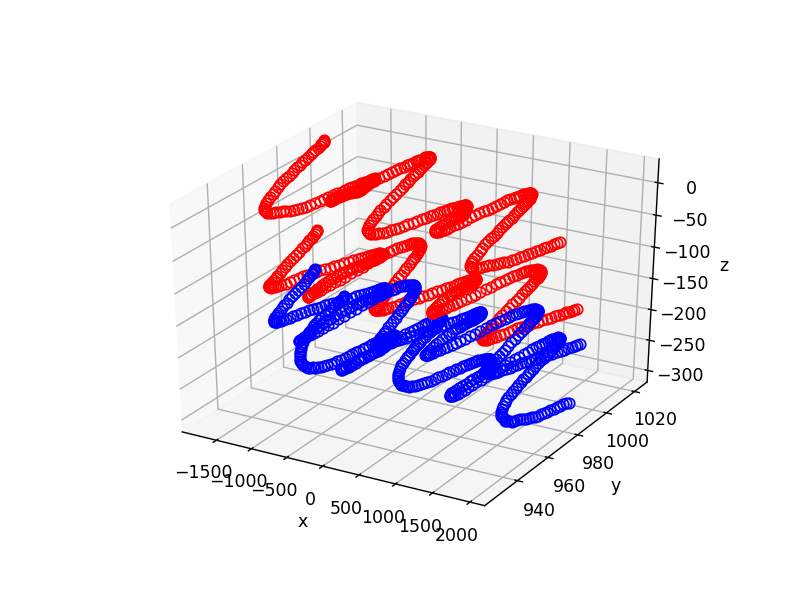

In [25]:
# Visualise the markers in 3D, frame by frame
fig = plt.figure()
ax = fig.add_subplot((111), projection='3d')

ax.plot(LASI[:,0],LASI[:,1],LASI[:,2],'ro',fillstyle='none') # Plot the LAsis in 3D space
ax.plot(RASI[:,0],RASI[:,1],RASI[:,2],'bo',fillstyle='none') # Plot the LAsis in 3D space
ax.plot(LPSI[:,0],LPSI[:,1],LPSI[:,2],'ro',fillstyle='none') # Plot the LAsis in 3D space
ax.plot(RPSI[:,0],RPSI[:,1],RPSI[:,2],'bo',fillstyle='none') # Plot the LAsis in 3D space

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

### Creating virtual markers

With the markers of the pelvis, we can also visualise the motion of the sacrum. The sacrum is situated between the LPsis and RPsis. Hence, we are able to create a 'virtual' marker as the average of the two markers.

<IPython.core.display.Javascript object>


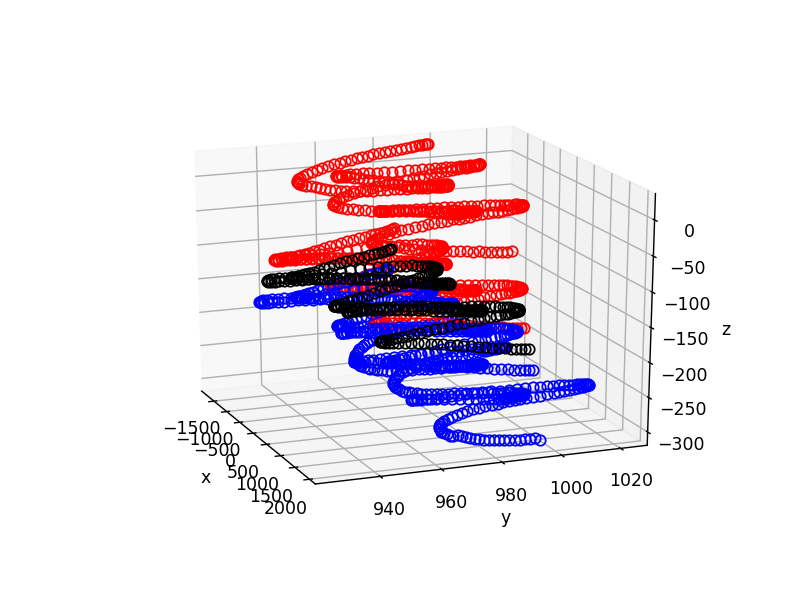

In [26]:
# Calculate Sacrum 'virtual' marker and visualise on the same plot
sacrum = (LPSI + RPSI)/2

fig = plt.figure()
ax = fig.add_subplot((111), projection='3d')

ax.plot(LASI[:,0],LASI[:,1],LASI[:,2],'ro',fillstyle='none') # Plot the LAsis in 3D space
ax.plot(RASI[:,0],RASI[:,1],RASI[:,2],'bo',fillstyle='none') # Plot the RAsis in 3D space
ax.plot(LPSI[:,0],LPSI[:,1],LPSI[:,2],'ro',fillstyle='none') # Plot the LPsis in 3D space
ax.plot(RPSI[:,0],RPSI[:,1],RPSI[:,2],'bo',fillstyle='none') # Plot the RPsis in 3D space

ax.plot(sacrum[:,0],sacrum[:,1],sacrum[:,2],'ko',fillstyle='none') # Plot the sacrum in 3D space

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

### Origin of the pelvis coordinate system

Similarly with the sacrum, we can also calculate the origin of the pelvis coordinate system as the average of the two RAsis and LAsis markers (the origin of the pelvis CS lies in between these two markers).

<IPython.core.display.Javascript object>


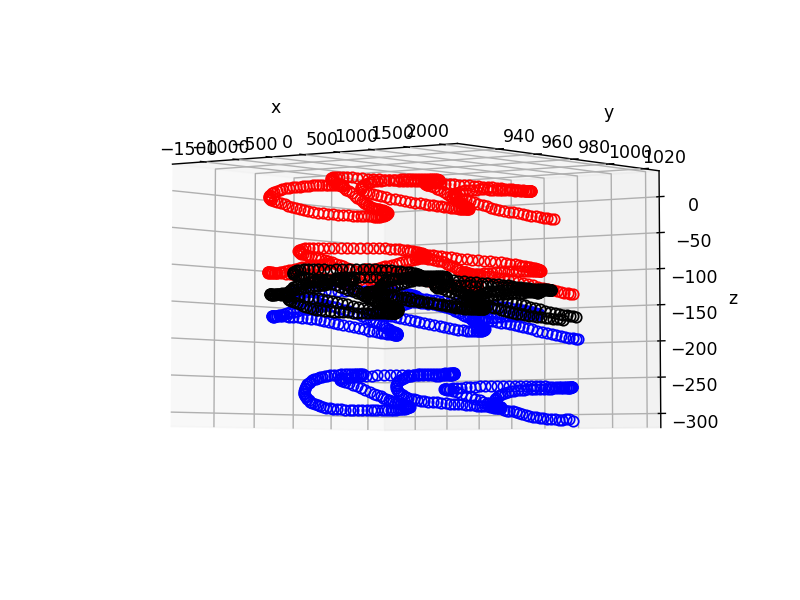

In [27]:
# Calculate origin of the pelvis coordinate system (pelvisCS) and visualise on the same axis
pelvis_origin = (RASI + LASI)/2

fig = plt.figure()
ax = fig.add_subplot((111), projection='3d')

ax.plot(LASI[:,0],LASI[:,1],LASI[:,2],'ro',fillstyle='none') # Plot the LAsis in 3D space
ax.plot(RASI[:,0],RASI[:,1],RASI[:,2],'bo',fillstyle='none') # Plot the RAsis in 3D space
ax.plot(LPSI[:,0],LPSI[:,1],LPSI[:,2],'ro',fillstyle='none') # Plot the LPsis in 3D space
ax.plot(RPSI[:,0],RPSI[:,1],RPSI[:,2],'bo',fillstyle='none') # Plot the RPsis in 3D space

ax.plot(sacrum[:,0],sacrum[:,1],sacrum[:,2],'ko',fillstyle='none') # Plot the sacrum in 3D space
ax.plot(pelvis_origin[:,0],pelvis_origin[:,1],pelvis_origin[:,2],'ko',fillstyle='none') # Plot the origin of the pelvisCS
# in 3D space

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

### Global Coordinate System

Finally, the marker coordinate data should be view with reference to the global coordinate system (GCS) which relates all the markers, and force plate data to one reference frame.

<IPython.core.display.Javascript object>


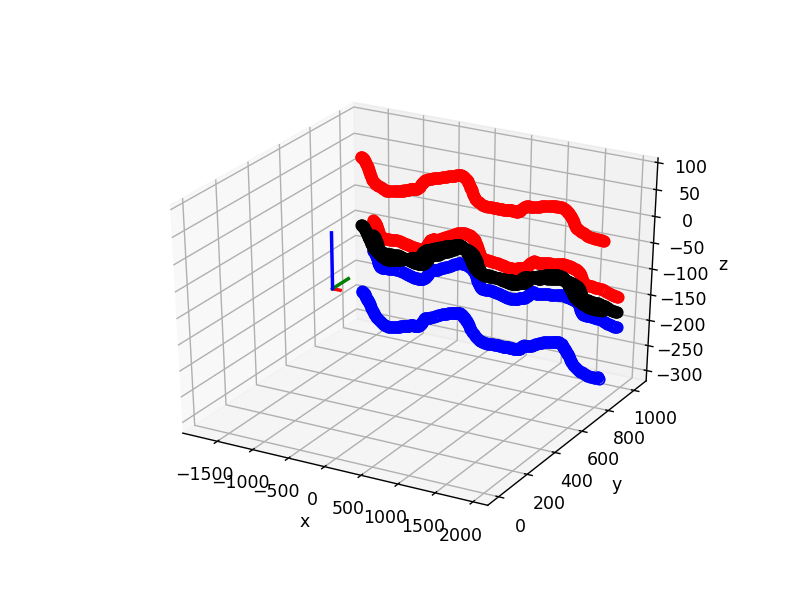

In [28]:
# Draw the global coordinate system (GCS) as a reference frame

fig = plt.figure()
ax = fig.add_subplot((111), projection='3d')
# It is not currently possible to manually set the aspect on 3D axes (27/11/2019). NotImplementedError due to bug found,
# Look to change to 'ax = fig.gca(projection='3d',aspect = 'equal')' when fixed.

ax.plot(LASI[:,0],LASI[:,1],LASI[:,2],'ro',fillstyle='none')
ax.plot(RASI[:,0],RASI[:,1],RASI[:,2],'bo',fillstyle='none')
ax.plot(LPSI[:,0],LPSI[:,1],LPSI[:,2],'ro',fillstyle='none')
ax.plot(RPSI[:,0],RPSI[:,1],RPSI[:,2],'bo',fillstyle='none')

ax.plot(sacrum[:,0],sacrum[:,1],sacrum[:,2],'ko',fillstyle='none')
ax.plot(pelvis_origin[:,0],pelvis_origin[:,1],pelvis_origin[:,2],'ko',fillstyle='none')

ax.plot([0,100], [0,0], [0,0],'r',linewidth='2')
ax.plot([0,0], [0,100], [0,0],'g',linewidth='2')
ax.plot([0,0], [0,0], [0,100],'b',linewidth='2')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()